In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-03-25 03:38:47--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.48.252, 2600:1413:b000:793::317f, 2600:1413:b000:78a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.48.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   138MB/s    in 4.9s    

2023-03-25 03:38:53 (159 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tqdm
import os
import random
from tensorflow.keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/4937.jpg 1


In [ ]:
len(input_path)

25002

In [ ]:
len(label)

25002

In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Dog/1154.jpg      1
1  PetImages/Dog/10557.jpg      1
2  PetImages/Cat/10204.jpg      0
3   PetImages/Cat/7867.jpg      0
4    PetImages/Dog/672.jpg      1

In [ ]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [ ]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/666.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db']

In [ ]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

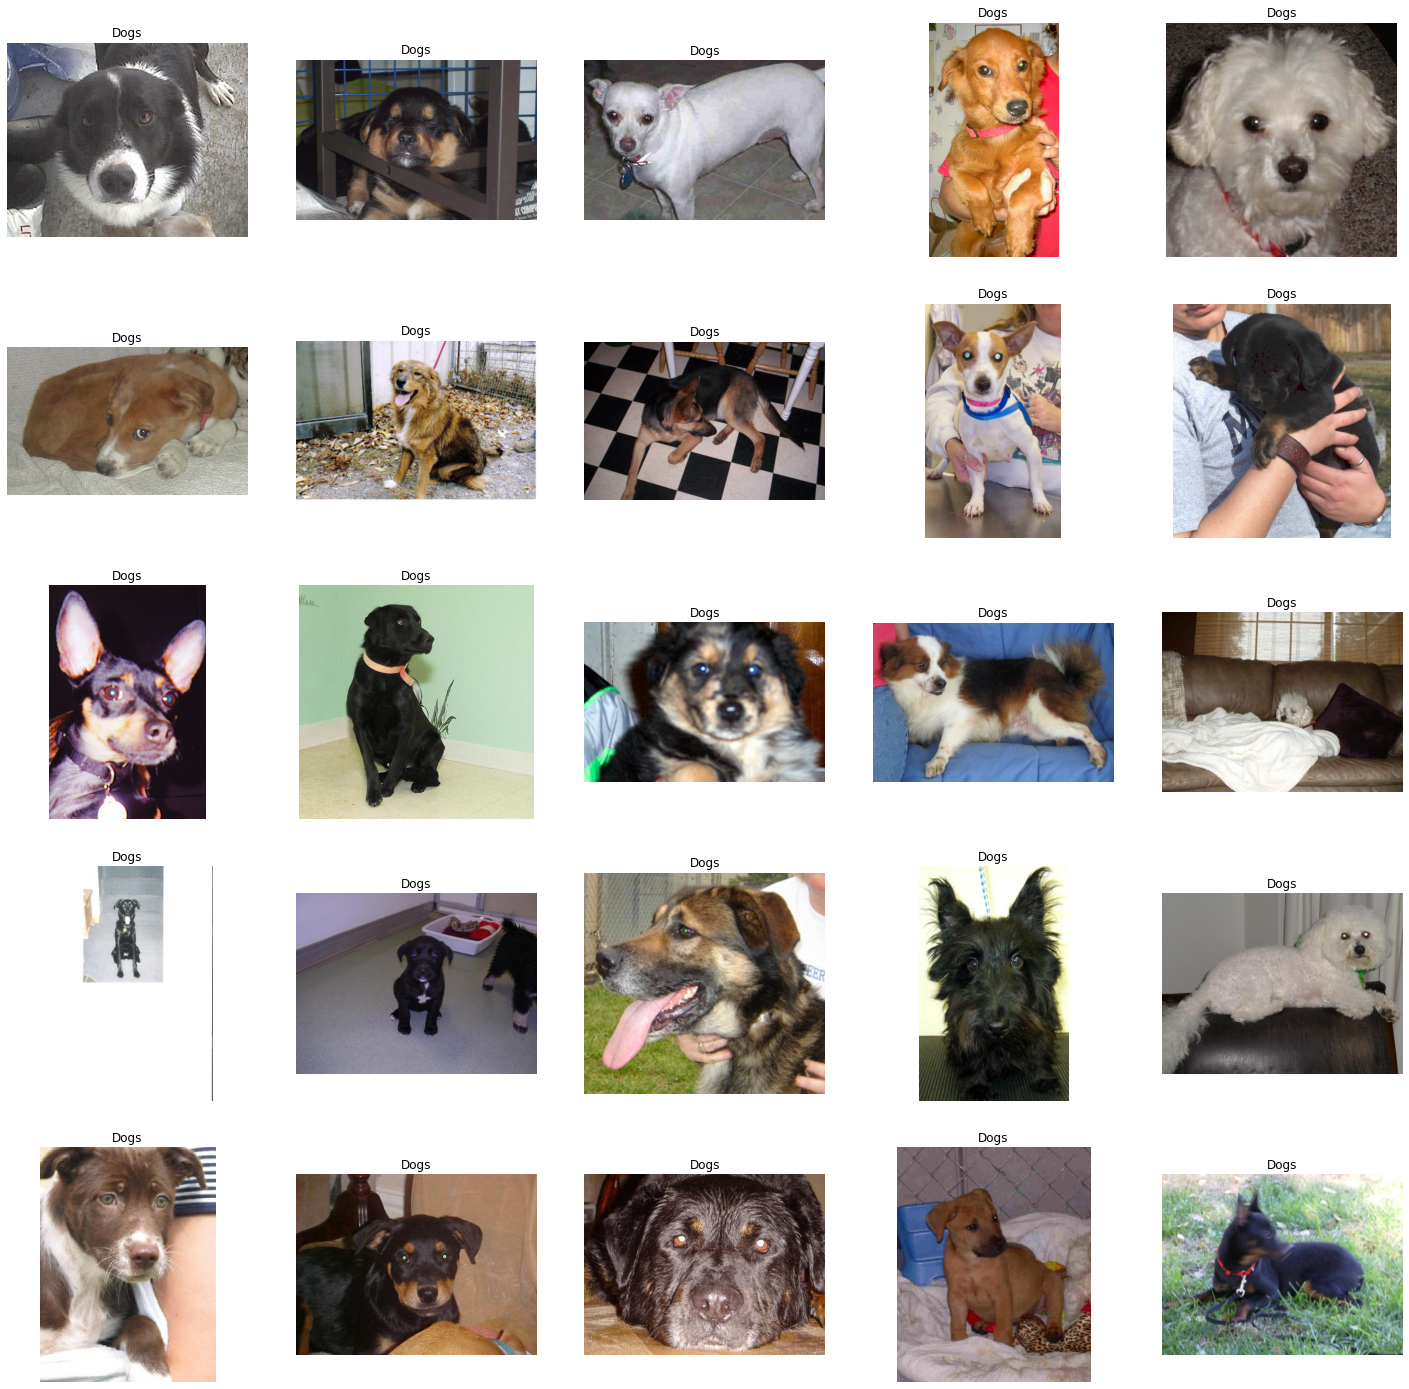

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

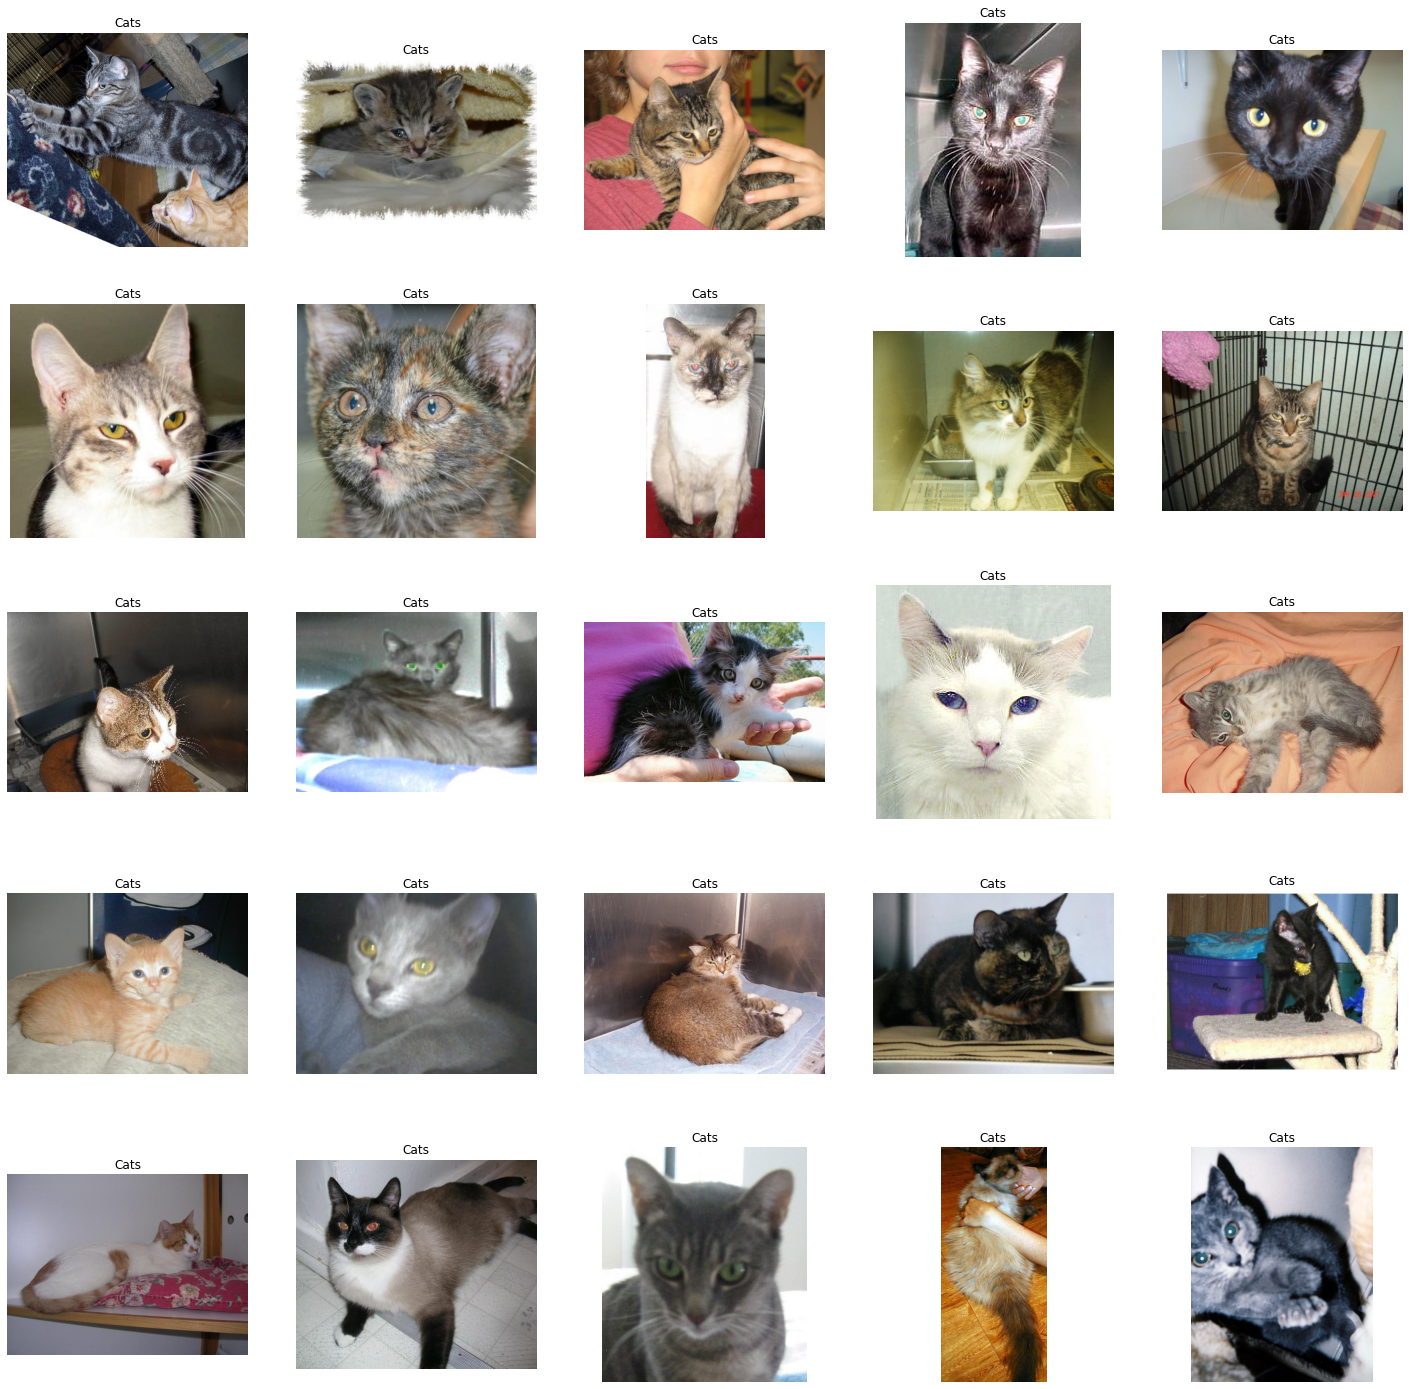

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

In [ ]:
df['label'] = df['label'].astype('str')

In [ ]:
df.head()

images label
0   PetImages/Dog/1154.jpg     1
1  PetImages/Dog/10557.jpg     1
2  PetImages/Cat/10204.jpg     0
3   PetImages/Cat/7867.jpg     0
4    PetImages/Dog/672.jpg     1

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train.head()

images label
23290  PetImages/Dog/6688.jpg     1
17784  PetImages/Cat/3324.jpg     0
1020   PetImages/Dog/2912.jpg     1
12647  PetImages/Cat/1481.jpg     0
1533   PetImages/Dog/3515.jpg     1

In [ ]:
test.head()

images label
6870   PetImages/Dog/1485.jpg     1
22914  PetImages/Cat/1099.jpg     0
9671   PetImages/Cat/1692.jpg     0
13641  PetImages/Cat/3883.jpg     0
23341  PetImages/Dog/3672.jpg     1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [31]:
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator)

Epoch 1/50
40/40 [==============================] - 152s 4s/step - loss: 0.4637 - accuracy: 0.7782 - val_loss: 0.4534 - val_accuracy: 0.7870
Epoch 2/50
40/40 [==============================] - 148s 4s/step - loss: 0.4601 - accuracy: 0.7819 - val_loss: 0.4524 - val_accuracy: 0.7912
Epoch 3/50
40/40 [==============================] - 148s 4s/step - loss: 0.4450 - accuracy: 0.7917 - val_loss: 0.4234 - val_accuracy: 0.8058
Epoch 4/50
40/40 [==============================] - 149s 4s/step - loss: 0.4292 - accuracy: 0.8003 - val_loss: 0.4242 - val_accuracy: 0.8048
Epoch 5/50
40/40 [==============================] - 148s 4s/step - loss: 0.4213 - accuracy: 0.8037 - val_loss: 0.3996 - val_accuracy: 0.8190
Epoch 6/50
40/40 [==============================] - 153s 4s/step - loss: 0.4180 - accuracy: 0.8058 - val_loss: 0.4182 - val_accuracy: 0.8052
Epoch 7/50
40/40 [==============================] - 148s 4s/step - loss: 0.4061 - accuracy: 0.8162 - val_loss: 0.3876 - val_accuracy: 0.8294
Epoch 8/50
40

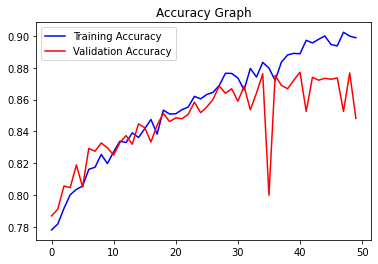

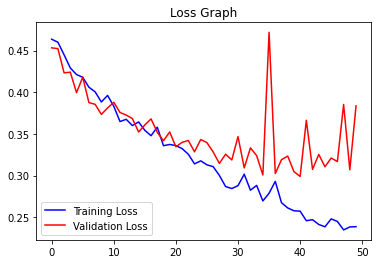

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [33]:
model.save('cat_dog_predict_model_50.pt')

In [34]:
from keras.models import load_model
new_model=load_model('cat_dog_predict_model_50.pt')

1/1 [==============================] - 0s 71ms/step
Dog


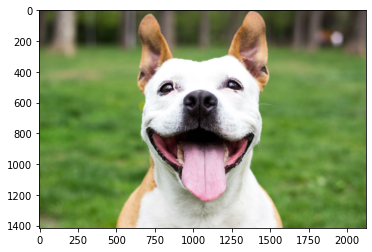

In [35]:
image_path = "test1.jpg" 
##plt.imshow(image_path)
imge=plt.imread("test1.jpg" )
plt.imshow(imge)
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 
img = img.reshape(1, 128, 128, 3) 
pred = new_model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)
##plt.imshow(image_path)

1/1 [==============================] - 0s 19ms/step
Cat


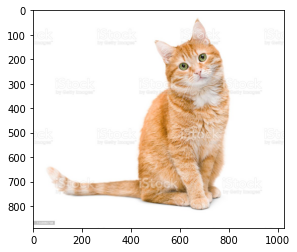

In [36]:
image_path = "test2.jpg" 
imge=plt.imread("test2.jpg" )
plt.imshow(imge)
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 
img = img.reshape(1, 128, 128, 3) 
pred = new_model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)